# Tuần 2 – Bài thực hành Tổ hợp – Chỉnh hợp – Hoán vị

## Mục tiêu
- Ôn lại định nghĩa và công thức các phép đếm cơ bản trong Tổ hợp.
- Viết code Python để kiểm chứng công thức bằng ví dụ cụ thể.
- Minh họa trực quan bằng biểu đồ.

## Công cụ sử dụng
Sử dụng các thư viện chuẩn của Python: `math`, `itertools`, `matplotlib`.

In [1]:
import math
import itertools
import matplotlib.pyplot as plt

## Phần 1. Hoán vị (Permutation)

Với \( n \) phần tử khác nhau, số hoán vị là:

$$
P_n = n!
$$

Ví dụ với 4 phần tử: ['A', 'B', 'C', 'D']

In [2]:
n = 4
items = ['A', 'B', 'C', 'D']

print("Formula:", math.factorial(n))
all_perms = list(itertools.permutations(items))
print("Count:", len(all_perms))
print("First 5 permutations:", all_perms[:5])

Formula: 24
Count: 24
First 5 permutations: [('A', 'B', 'C', 'D'), ('A', 'B', 'D', 'C'), ('A', 'C', 'B', 'D'), ('A', 'C', 'D', 'B'), ('A', 'D', 'B', 'C')]


### Minh họa cây hoán vị

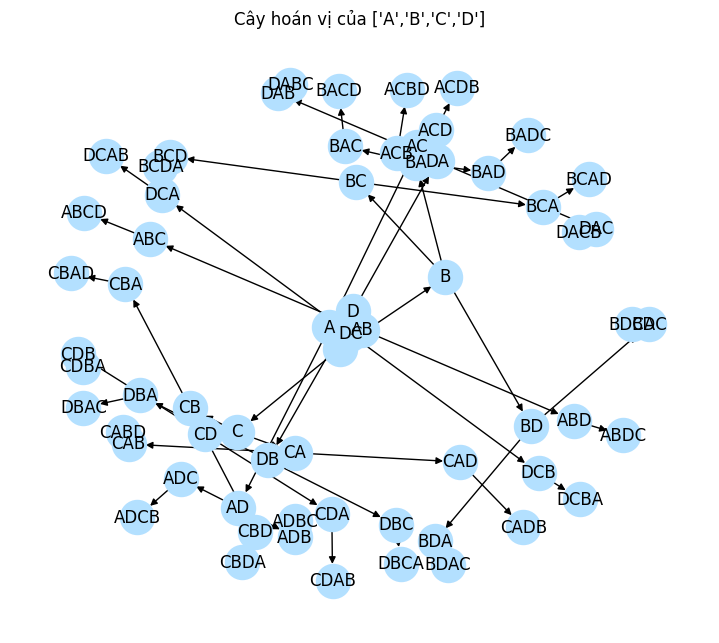

In [3]:
import networkx as nx

G = nx.DiGraph()
for perm in all_perms:
    for i in range(len(perm)):
        prefix = "".join(perm[:i])
        G.add_edge(prefix, prefix + perm[i])

plt.figure(figsize=(7,6))
nx.draw(G, with_labels=True, node_size=600, node_color="#b3e0ff")
plt.title("Cây hoán vị của ['A','B','C','D']")
plt.show()

## Phần 1b. Hoán vị có lặp (Permutation with repetition)

Khi trong tập có các phần tử giống nhau, số hoán vị được tính bằng:

$$
P_{n;(n_1,n_2,...,n_k)} = \frac{n!}{n_1! \cdot n_2! \cdot ... \cdot n_k!}
$$

**Ví dụ:** Từ "LEVEL" có 5 ký tự, trong đó L:2, E:2, V:1.

$$
P = \frac{5!}{2! \cdot 2!} = 30
$$

In [4]:
word = "LEVEL"
n = len(word)
counts = {'L': 2, 'E': 2, 'V': 1}
denominator = math.prod(math.factorial(v) for v in counts.values())
print("Result:", math.factorial(n)//denominator)

Result: 30


## Phần 2. Chỉnh hợp (Arrangement)

Chọn \( k \) phần tử trong \( n \) phần tử và xếp theo thứ tự.

$$
A_n^k = \frac{n!}{(n-k)!}
$$

In [5]:
n, k = 5, 3
items = ['A', 'B', 'C', 'D', 'E']
arrangements = list(itertools.permutations(items, k))
print("Count:", len(arrangements))
print("Formula:", math.factorial(n) // math.factorial(n - k))
print("First 5:", arrangements[:5])

Count: 60
Formula: 60
First 5: [('A', 'B', 'C'), ('A', 'B', 'D'), ('A', 'B', 'E'), ('A', 'C', 'B'), ('A', 'C', 'D')]


### Biểu đồ số chỉnh hợp theo k

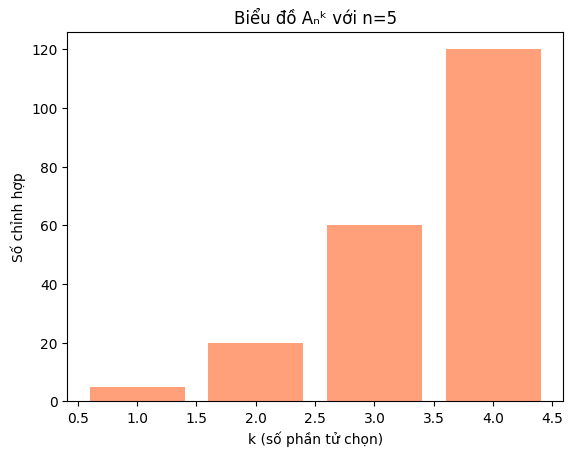

In [6]:
counts = [math.factorial(n)//math.factorial(n-i) for i in range(1,n)]
plt.bar(range(1,n), counts, color="#ffa07a")
plt.xlabel("k (số phần tử chọn)")
plt.ylabel("Số chỉnh hợp")
plt.title(f"Biểu đồ Aₙᵏ với n={n}")
plt.show()

## Phần 3. Chỉnh hợp có lặp (Arrangement with repetition)

Cho phép chọn trùng lặp, có thứ tự.

$$
n^k
$$

In [7]:
n, k = 3, 2
items = ['A', 'B', 'C']
arr_repeat = list(itertools.product(items, repeat=k))
print("Count:", len(arr_repeat))
print("Formula:", n ** k)
print("All:", arr_repeat)

Count: 9
Formula: 9
All: [('A', 'A'), ('A', 'B'), ('A', 'C'), ('B', 'A'), ('B', 'B'), ('B', 'C'), ('C', 'A'), ('C', 'B'), ('C', 'C')]


### Biểu đồ lưới Cartesian

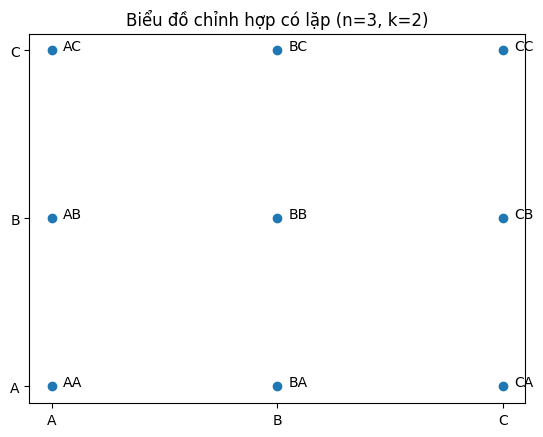

In [8]:
pairs = [(i,j) for i in items for j in items]
x, y = zip(*[(ord(a)-65, ord(b)-65) for a,b in pairs])
plt.scatter(x, y)
for a,b in pairs:
    plt.text(ord(a)-65+0.05, ord(b)-65, f"{a}{b}")
plt.xticks(range(3), items)
plt.yticks(range(3), items)
plt.title("Biểu đồ chỉnh hợp có lặp (n=3, k=2)")
plt.show()

## Phần 4. Tổ hợp (Combination)

Chọn \( k \) phần tử trong \( n \) phần tử, không quan tâm thứ tự.

$$
C_n^k = \frac{n!}{k!(n-k)!}
$$

In [9]:
n, k = 5, 2
items = ['A', 'B', 'C', 'D', 'E']
combs = list(itertools.combinations(items, k))
print("Count:", len(combs))
print("Formula:", math.comb(n, k))
print("First 5:", combs[:5])

Count: 10
Formula: 10
First 5: [('A', 'B'), ('A', 'C'), ('A', 'D'), ('A', 'E'), ('B', 'C')]


### Minh họa tam giác tổ hợp

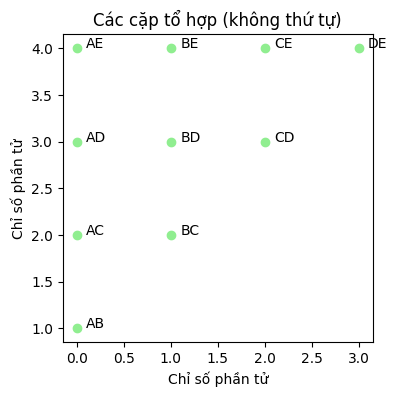

In [10]:
pairs = [(ord(a)-65, ord(b)-65) for a,b in combs]
plt.figure(figsize=(4,4))
plt.scatter(*zip(*pairs), color="#90ee90")
for a,b in combs:
    plt.text(ord(a)-65+0.1, ord(b)-65, f"{a}{b}")
plt.title("Các cặp tổ hợp (không thứ tự)")
plt.xlabel("Chỉ số phần tử")
plt.ylabel("Chỉ số phần tử")
plt.show()

## Phần 5. Tổ hợp có lặp (Combination with repetition)

Chọn \( k \) phần tử trong \( n \) phần tử, cho phép trùng, không thứ tự.

$$
C'^{k}_n = C_{n + k - 1}^k = \frac{(n + k - 1)!}{k!(n - 1)!}
$$

In [11]:
n, k = 3, 2
items = ['A', 'B', 'C']
comb_wr = list(itertools.combinations_with_replacement(items, k))
print("Count:", len(comb_wr))
print("Formula:", math.comb(n + k - 1, k))
print("All:", comb_wr)

Count: 6
Formula: 6
All: [('A', 'A'), ('A', 'B'), ('A', 'C'), ('B', 'B'), ('B', 'C'), ('C', 'C')]


### Biểu đồ vùng tam giác trên

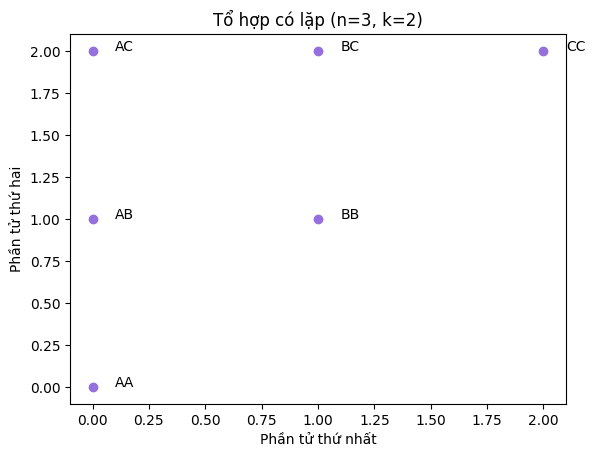

In [12]:
pairs = [(ord(a)-65, ord(b)-65) for a,b in comb_wr]
plt.scatter(*zip(*pairs), color="#9370db")
for a,b in comb_wr:
    plt.text(ord(a)-65+0.1, ord(b)-65, f"{a}{b}")
plt.title("Tổ hợp có lặp (n=3, k=2)")
plt.xlabel("Phần tử thứ nhất")
plt.ylabel("Phần tử thứ hai")
plt.show()

## Phần 6. Ứng dụng thực tế

| Ứng dụng | Loại phép toán | Giải thích | Ví dụ |
|-----------|----------------|------------|--------|
| Mật khẩu | Chỉnh hợp có lặp | Có thể lặp ký tự, có thứ tự | 26^8 mật khẩu 8 ký tự |
| Xổ số Powerball | Tổ hợp | Không quan trọng thứ tự, không trùng | C(69,5) * 26 |
| Mã màu RGB | Chỉnh hợp có lặp | Mỗi màu từ 0–255, có lặp, có thứ tự | 256^3 màu |
| Xếp đội hình thi đấu | Chỉnh hợp | Thứ tự vị trí khác nhau, không lặp | A₁₁³ = 990 |
| Chuỗi ADN / Mã gene | Hoán vị có lặp | Có ký tự trùng (A, T, G, C) | Ví dụ “AATCG” |
| Phân phối vật phẩm | Tổ hợp có lặp | Chia vật giống nhau cho nhóm khác nhau | 3 loại bánh, chọn 2 cái → 6 cách |
| Thứ tự chỗ ngồi / ghép bàn ăn | Hoán vị | Tất cả n phần tử khác nhau | 5! = 120 cách |

## Phần 7. Tổng kết công thức

| Phép toán | Có thứ tự | Có lặp | Công thức | Hàm Python |
|------------|------------|----------|------------|--------------|
| Hoán vị | ✔️ | ❌ | $ n! $ | `itertools.permutations(n)` |
| Hoán vị có lặp | ✔️ | ✔️ | $ \frac{n!}{k_1!n_2!...} $ | `collections.Counter` |
| Chỉnh hợp | ✔️ | ❌ | $ \frac{n!}{(n-k)!} $ | `itertools.permutations(n, k)` |
| Chỉnh hợp có lặp | ✔️ | ✔️ | $ n^k $ | `itertools.product(n, repeat=k)` |
| Tổ hợp | ❌ | ❌ | $ \frac{n!}{k!(n-k)!} $ | `itertools.combinations(n, k)` |
| Tổ hợp có lặp | ❌ | ✔️ | $ \frac{(n+k-1)!}{k!(n-1)!} $ | `itertools.combinations_with_replacement(n, k)` |

### Biểu đồ so sánh tốc độ tăng của chỉnh hợp và tổ hợp

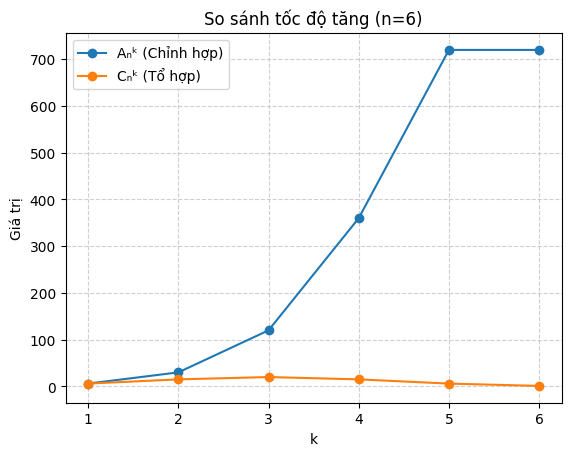

In [13]:
n = 6
k_values = list(range(1, n+1))
arr = [math.factorial(n)//math.factorial(n-k) for k in k_values]
comb = [math.comb(n, k) for k in k_values]

plt.plot(k_values, arr, label="Aₙᵏ (Chỉnh hợp)", marker='o')
plt.plot(k_values, comb, label="Cₙᵏ (Tổ hợp)", marker='o')
plt.legend()
plt.title("So sánh tốc độ tăng (n=6)")
plt.xlabel("k")
plt.ylabel("Giá trị")
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

## Kết luận

- Hoán vị: sắp xếp tất cả phần tử khác nhau.  
- Hoán vị có lặp: sắp xếp có phần tử trùng.  
- Chỉnh hợp: chọn và sắp xếp, không lặp.  
- Chỉnh hợp có lặp: chọn và sắp xếp, có lặp.  
- Tổ hợp: chọn, không thứ tự.  
- Tổ hợp có lặp: chọn, không thứ tự, được lặp.  

Kết quả Python xác nhận công thức lý thuyết.